In [1]:
#Logistic Regression 
#Lamba - KFold 
#Differentiation
#Accuracy measures 
#1.5 - 2 
#Support Vector Machine 

#Tomorrow 
#Naive Bayes 
#KNN
#Decision Tree

#Saturday
#Ensemble Technique - Random Forest 
#XGBoost 
#Regression 

#Sunday 
#KMEans 
#Hierarchical
#Association Rule 

#Time series analysis 
#Reinforcement Learning 
#Recommendation 
#PCA - Dimensionality Reduction 

In [2]:
import os 
os.chdir(r'E:\D\Imarticus')

In [5]:
import pandas as pd

In [6]:
dataset = pd.read_csv('Python_Credit_Risk_XTrain.csv')

In [12]:
dataset.isnull().sum()/len(dataset)*100

Loan_ID              0.0
Gender               0.0
Married              0.0
Dependents           0.0
Education            0.0
Self_Employed        0.0
ApplicantIncome      0.0
CoapplicantIncome    0.0
LoanAmount           0.0
Loan_Amount_Term     0.0
Credit_History       0.0
Property_Area        0.0
Loan_Status          0.0
dtype: float64

In [10]:
dataset.groupby('Gender').size()

Gender
Female    112
Male      489
dtype: int64

In [11]:
dataset['Gender'] = dataset['Gender'].fillna('Male')
dataset['Married'] = dataset['Married'].fillna('Yes')
dataset['Dependents'] = dataset['Dependents'].fillna('0')
dataset['Self_Employed'] = dataset['Self_Employed'].fillna('No')
dataset['LoanAmount'] = dataset['LoanAmount'].fillna(dataset['LoanAmount'].median())
dataset['Loan_Amount_Term'] = dataset['Loan_Amount_Term'].fillna(360)
dataset['Credit_History'] = dataset['Credit_History'].fillna(1.0)

In [13]:
dataset

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [14]:
dataset['Gender'] = dataset['Gender'].astype('category')
dataset['Gender'] = dataset['Gender'].cat.codes
dataset['Married'] = dataset['Married'].astype('category')
dataset['Married'] = dataset['Married'].cat.codes
dataset['Dependents'] = dataset['Dependents'].astype('category')
dataset['Dependents'] = dataset['Dependents'].cat.codes
dataset['Education'] = dataset['Education'].astype('category')
dataset['Education'] = dataset['Education'].cat.codes
dataset['Self_Employed'] = dataset['Self_Employed'].astype('category')
dataset['Self_Employed'] = dataset['Self_Employed'].cat.codes
dataset['Loan_Amount_Term'] = dataset['Loan_Amount_Term'].astype('category')
dataset['Loan_Amount_Term'] = dataset['Loan_Amount_Term'].cat.codes
dataset['Property_Area'] = dataset['Property_Area'].astype('category')
dataset['Property_Area'] = dataset['Property_Area'].cat.codes
dataset['Loan_Status'] = dataset['Loan_Status'].astype('category')
dataset['Loan_Status'] = dataset['Loan_Status'].cat.codes

In [16]:
dataset

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,0,0,5849,0.0,128.0,8,1.0,2,1
1,LP001003,1,1,1,0,0,4583,1508.0,128.0,8,1.0,0,0
2,LP001005,1,1,0,0,1,3000,0.0,66.0,8,1.0,2,1
3,LP001006,1,1,0,1,0,2583,2358.0,120.0,8,1.0,2,1
4,LP001008,1,0,0,0,0,6000,0.0,141.0,8,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,0,0,0,0,0,2900,0.0,71.0,8,1.0,0,1
610,LP002979,1,1,3,0,0,4106,0.0,40.0,5,1.0,0,1
611,LP002983,1,1,1,0,0,8072,240.0,253.0,8,1.0,2,1
612,LP002984,1,1,2,0,0,7583,0.0,187.0,8,1.0,2,1


In [22]:
x = dataset.iloc[:,1:12].values
y=dataset.iloc[:,-1].values

In [23]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
x = sc_x.fit_transform(x)

In [26]:
pd.DataFrame(x)

,0,1,2,3,4,5,6,7,8,9,10
0,0.472343,-1.372089,-0.737806,-0.528362,-0.392601,0.072991,-0.554487,-0.211241,0.299776,0.411733,1.223298
1,0.472343,0.728816,0.253470,-0.528362,-0.392601,-0.134412,-0.038732,-0.211241,0.299776,0.411733,-1.318513
2,0.472343,0.728816,-0.737806,-0.528362,2.547117,-0.393747,-0.554487,-0.948996,0.299776,0.411733,1.223298
3,0.472343,0.728816,-0.737806,1.892641,-0.392601,-0.462062,0.251980,-0.306435,0.299776,0.411733,1.223298
4,0.472343,-1.372089,-0.737806,-0.528362,-0.392601,0.097728,-0.554487,-0.056551,0.299776,0.411733,1.223298
...,...,...,...,...,...,...,...,...,...,...,...
609,-2.117107,-1.372089,-0.737806,-0.528362,-0.392601,-0.410130,-0.554487,-0.889500,0.299776,0.411733,-1.318513
610,0.472343,0.728816,2.236021,-0.528362,-0.392601,-0.212557,-0.554487,-1.258378,-2.407023,0.411733,-1.318513
611,0.472343,0.728816,0.253470,-0.528362,-0.392601,0.437174,-0.472404,1.276168,0.299776,0.411733,1.223298
612,0.472343,0.728816,1.244745,-0.528362,-0.392601,0.357064,-0.554487,0.490816,0.299776,0.411733,1.223298


In [27]:
y

array([1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0,

In [60]:
#from sklearn.model_selection import train_test_split
#x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [61]:
#x_train

In [35]:
#len(x_train)

491

In [33]:
#len(y_train)

491

In [62]:
#len(x)*0.8

In [63]:
x

array([[ 0.47234264, -1.37208932, -0.73780632, ...,  0.29977577,
         0.41173269,  1.22329839],
       [ 0.47234264,  0.72881553,  0.25346957, ...,  0.29977577,
         0.41173269, -1.31851281],
       [ 0.47234264,  0.72881553, -0.73780632, ...,  0.29977577,
         0.41173269,  1.22329839],
       ...,
       [ 0.47234264,  0.72881553,  0.25346957, ...,  0.29977577,
         0.41173269,  1.22329839],
       [ 0.47234264,  0.72881553,  1.24474546, ...,  0.29977577,
         0.41173269,  1.22329839],
       [-2.11710719, -1.37208932, -0.73780632, ...,  0.29977577,
        -2.42876026, -0.04760721]])

In [64]:
y

array([1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0,

In [65]:
from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression()
log_model.fit(x,y)

LogisticRegression()

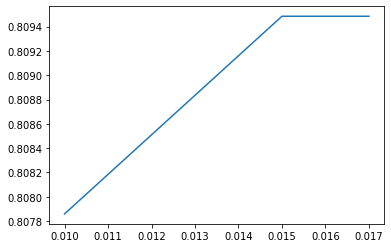

In [76]:
from sklearn.model_selection import cross_val_score
import numpy as np
import matplotlib.pyplot as plt

cv_scores =[]
lamdainv = [0.01,0.015,0.016,0.017]

for c in lamdainv:
    log_model = LogisticRegression(C=c)
    scores = cross_val_score(log_model,x,y,cv=3,scoring='accuracy')
    cv_scores.append(scores.mean())
    
plt.plot(lamdainv,cv_scores)

In [157]:
from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression(penalty='l1',solver='saga',max_iter=3,tol=0.0001, C=0.015)
log_model.fit(x,y)

C:\Users\Rahul\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


LogisticRegression(C=0.015, max_iter=3, penalty='l1', solver='saga')

In [158]:
log_model.coef_

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.63083544,
        0.        ]])

In [80]:
pd.DataFrame(x)

,0,1,2,3,4,5,6,7,8,9,10
0,0.472343,-1.372089,-0.737806,-0.528362,-0.392601,0.072991,-0.554487,-0.211241,0.299776,0.411733,1.223298
1,0.472343,0.728816,0.253470,-0.528362,-0.392601,-0.134412,-0.038732,-0.211241,0.299776,0.411733,-1.318513
2,0.472343,0.728816,-0.737806,-0.528362,2.547117,-0.393747,-0.554487,-0.948996,0.299776,0.411733,1.223298
3,0.472343,0.728816,-0.737806,1.892641,-0.392601,-0.462062,0.251980,-0.306435,0.299776,0.411733,1.223298
4,0.472343,-1.372089,-0.737806,-0.528362,-0.392601,0.097728,-0.554487,-0.056551,0.299776,0.411733,1.223298
...,...,...,...,...,...,...,...,...,...,...,...
609,-2.117107,-1.372089,-0.737806,-0.528362,-0.392601,-0.410130,-0.554487,-0.889500,0.299776,0.411733,-1.318513
610,0.472343,0.728816,2.236021,-0.528362,-0.392601,-0.212557,-0.554487,-1.258378,-2.407023,0.411733,-1.318513
611,0.472343,0.728816,0.253470,-0.528362,-0.392601,0.437174,-0.472404,1.276168,0.299776,0.411733,1.223298
612,0.472343,0.728816,1.244745,-0.528362,-0.392601,0.357064,-0.554487,0.490816,0.299776,0.411733,1.223298


In [82]:
test = pd.read_csv('Python_Module_Day_15.4_Credit_Risk_Validate_data_XTEST.csv')

In [86]:
test.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
outcome              0
dtype: int64

In [84]:
test['Gender'] = test['Gender'].fillna('Male')
test['Gender'] = test['Gender'].astype('category')
test['Gender'] = test['Gender'].cat.codes

test['Dependents'] = test['Dependents'].fillna('0')
test['Dependents'] = test['Dependents'].astype('category')
test['Dependents'] = test['Dependents'].cat.codes

test['Self_Employed'] = test['Self_Employed'].fillna('No')

test['Self_Employed'] = test['Self_Employed'].astype('category')
test['Self_Employed'] = test['Self_Employed'].cat.codes

In [85]:

test['LoanAmount'] = test['LoanAmount'].fillna(test['LoanAmount'].median())
test['Loan_Amount_Term'] = test['Loan_Amount_Term'].fillna(360)

test['Loan_Amount_Term'] = test['Loan_Amount_Term'].astype('category')
test['Loan_Amount_Term'] = test['Loan_Amount_Term'].cat.codes
test['Credit_History'] = test['Credit_History'].fillna(1.0)

test['outcome'] = test['outcome'].astype('category')
test['outcome'] = test['outcome'].cat.codes
test['Married'] = test['Married'].astype('category')
test['Married'] = test['Married'].cat.codes
test['Education'] = test['Education'].astype('category')
test['Education'] = test['Education'].cat.codes
test['Property_Area'] = test['Property_Area'].astype('category')
test['Property_Area'] = test['Property_Area'].cat.codes


In [87]:
x_test = test.iloc[:,1:12].values
y_test = test.iloc[:,-1].values

In [88]:
sc_x = StandardScaler()
x_test = sc_x.fit_transform(x_test)

In [89]:
x_test

array([[ 0.48547939,  0.75835829, -0.75822199, ...,  0.30677633,
         0.4376739 ,  1.11876379],
       [ 0.48547939,  0.75835829,  0.18187082, ...,  0.30677633,
         0.4376739 ,  1.11876379],
       [ 0.48547939,  0.75835829,  1.12196363, ...,  0.30677633,
         0.4376739 ,  1.11876379],
       ...,
       [ 0.48547939, -1.31863792, -0.75822199, ...,  0.30677633,
         0.4376739 , -0.09598861],
       [ 0.48547939,  0.75835829, -0.75822199, ...,  0.30677633,
         0.4376739 , -1.31074101],
       [ 0.48547939, -1.31863792, -0.75822199, ..., -2.43924597,
         0.4376739 , -1.31074101]])

In [92]:
y_pred = log_model.predict(x_test)

In [93]:
y_pred

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,

In [90]:
y_test

array([1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1,

In [159]:
from sklearn.metrics import accuracy_score,confusion_matrix
accuracy_score(y_test,y_pred)

0.9455040871934605

In [160]:
confusion_matrix(y_test,y_pred)

array([[ 58,  19],
       [  1, 289]], dtype=int64)

In [95]:
new_cust = pd.read_csv('Python_Module_Day_15.3_Credit_Risk_Test_data.csv')

In [97]:
new_cust.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [98]:
new_cust['Gender'] = new_cust['Gender'].fillna('Male')
new_cust['Gender'] = new_cust['Gender'].astype('category')
new_cust['Gender'] = new_cust['Gender'].cat.codes

new_cust['Dependents'] = new_cust['Dependents'].fillna('0')
new_cust['Dependents'] = new_cust['Dependents'].astype('category')
new_cust['Dependents'] = new_cust['Dependents'].cat.codes

new_cust['Self_Employed'] = new_cust['Self_Employed'].fillna('No')

new_cust['Self_Employed'] = new_cust['Self_Employed'].astype('category')
new_cust['Self_Employed'] = new_cust['Self_Employed'].cat.codes

In [100]:

new_cust['LoanAmount'] = new_cust['LoanAmount'].fillna(new_cust['LoanAmount'].median())
new_cust['Loan_Amount_Term'] = new_cust['Loan_Amount_Term'].fillna(360)

new_cust['Loan_Amount_Term'] = new_cust['Loan_Amount_Term'].astype('category')
new_cust['Loan_Amount_Term'] = new_cust['Loan_Amount_Term'].cat.codes
new_cust['Credit_History'] = new_cust['Credit_History'].fillna(1.0)

#new_cust['outcome'] = new_cust['outcome'].astype('category')
#new_cust['outcome'] = new_cust['outcome'].cat.codes
new_cust['Married'] = new_cust['Married'].astype('category')
new_cust['Married'] = new_cust['Married'].cat.codes
new_cust['Education'] = new_cust['Education'].astype('category')
new_cust['Education'] = new_cust['Education'].cat.codes
new_cust['Property_Area'] = new_cust['Property_Area'].astype('category')
new_cust['Property_Area'] = new_cust['Property_Area'].cat.codes


In [101]:
x_new = new_cust.iloc[:,1:12].values

In [102]:
sc_x = StandardScaler()
x_new = sc_x.fit_transform(x_new)

In [103]:
y_outcome = log_model.predict(x_new)

In [104]:
y_outcome

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,

In [109]:
final_outcome = pd.concat([new_cust, pd.DataFrame(y_outcome)],axis=1)

In [113]:
final_outcome.rename(columns={0:'Outcome'},inplace=True)

In [117]:
final_outcome
final_outcome['Outcome']=final_outcome.Outcome.map({1:'Eligible', 0:'Not Eligible'})

In [119]:
final_outcome.to_csv('Final_outome.csv')

In [120]:
log_model.coef_

array([[ 4.07023701e-04,  1.42629780e-01,  2.13163244e-02,
        -1.03204243e-01, -2.99772853e-03,  4.48905209e-03,
        -9.49817208e-02, -6.63779183e-02, -4.00678108e-03,
         7.42085339e-01,  4.41336022e-02]])

In [121]:
dataset

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,0,0,5849,0.0,128.0,8,1.0,2,1
1,LP001003,1,1,1,0,0,4583,1508.0,128.0,8,1.0,0,0
2,LP001005,1,1,0,0,1,3000,0.0,66.0,8,1.0,2,1
3,LP001006,1,1,0,1,0,2583,2358.0,120.0,8,1.0,2,1
4,LP001008,1,0,0,0,0,6000,0.0,141.0,8,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,0,0,0,0,0,2900,0.0,71.0,8,1.0,0,1
610,LP002979,1,1,3,0,0,4106,0.0,40.0,5,1.0,0,1
611,LP002983,1,1,1,0,0,8072,240.0,253.0,8,1.0,2,1
612,LP002984,1,1,2,0,0,7583,0.0,187.0,8,1.0,2,1
